# Snabbrapport inför nästa kampanjperiod

Rekommendationer
- [kommer]
- [kommer]

Vad / när / hur

+ Vad säljer? – vilka kategorier driver mest intäkt?
+ Var säljer vi? – vilka städer står för störst intäkt?
+ När säljer vi? – finns tidsmönster/säsong i försäljningen?
+ Eventuella avvikelser – något oväntat mönster som sticker ut?

Nyckeltal

- Total intäkt och totalt antal enheter
- Intäkt per kategori
- Intäkt per stad


In [ ]:
# DATA LOADING - för hela rapporten
import sys
import os
sys.path.append('..')

from src.io_utils import ladda_data

# Ladda data en gång för alla analyser
df = ladda_data('data/ecommerce_sales.csv')
print(f"Data laddad: {len(df)} ordrar redo för analys")

## Top 3 bäst säljande kategorier 2024

In [ ]:
from src.metrics import ladda_data, get_top_3_categories

top3 = get_top_3_categories(df)
print("Topp 3 kategorier med högst intäkt:")
for category, revenue in top3.items():
    print(f"{category}: {int(round(revenue)):,} SEK".replace(",", " "))


# Denna del analyserar försäljningsdata för att ge insikter såsom:
- Hur ser en typisk order ut? – **AOV (Average Order Value)**  
- Spridning av ordervärden


## Genomsnittligt Ordervärde (AOV)

In [ ]:
# AOV
from src.metrics import calculate_aov

aov = calculate_aov(df)
print(f"Genomsnittligt ordervärde: {aov:.2f} SEK")

# Spridning av Ordervärden

In [ ]:
# Analysera spridningen
import matplotlib.pyplot as plt

# Grundläggande statistik
print("Spridning:")
print(f"Median: {df['revenue'].median():.2f} SEK")
print(f"Standardavvikelse: {df['revenue'].std():.2f} SEK")
print(f"Lägsta order: {df['revenue'].min():.2f} SEK")
print(f"Högsta order: {df['revenue'].max():.2f} SEK")

# %:er
print(f"25e %: {df['revenue'].quantile(0.25):.2f} SEK")
print(f"75e %: {df['revenue'].quantile(0.75):.2f} SEK")

In [ ]:
# Spridning av ordervärden
plt.hist(df['revenue'], bins=30)
plt.title('Ordervärden')
plt.xlabel('SEK')
plt.ylabel('Antal ordrar')
plt.show()

# Insikter
- Kunder handlar i genomsnitt för **1400 SEK** per order
- Majoriteten av ordrar ligger mellan **500 - 2500 SEK**
- Få kunder handlar för mycket höga eller låga belopp

# city sales analys

In [2]:
from src.io_utils import ladda_data

df = ladda_data("data/ecommerce_sales.csv")

sales_cities = df['city'].to_list()

unique_cities = []

# Loop through and add only new cities
for city in sales_cities:
    if city not in unique_cities:
        unique_cities.append(city)


print(unique_cities) 


['Stockholm', 'Malmö', 'Uppsala', 'Göteborg', 'Västerås']


Total sales per city:
Stockholm: 1,227,201.94 SEK
Göteborg: 859,019.65 SEK
Malmö: 567,926.32 SEK
Uppsala: 551,478.42 SEK
Västerås: 297,140.90 SEK
The city with the highest total sales is Stockholm with total revenue of  1227201.94 SEK


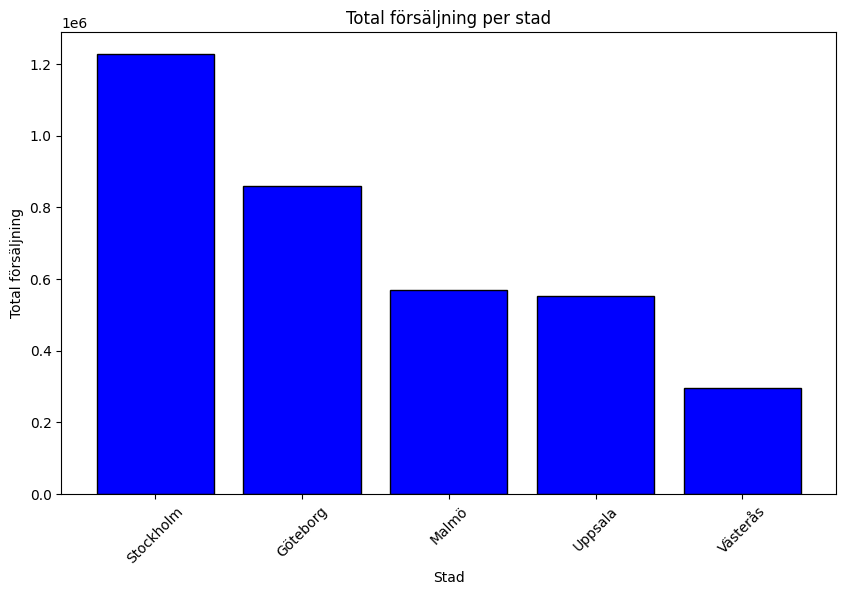

In [1]:

import matplotlib.pyplot as plt
from src.io_utils import ladda_data


df = ladda_data("data/ecommerce_sales.csv")



city_sales = df.groupby('city')['revenue'].sum().sort_values(ascending=False) # kaggle.com

print("Total sales per city:")

for city, sales in city_sales.items():
    print(f"{city}: {sales:,.2f} SEK")



max_city = city_sales.idxmax()
max_sales = city_sales.max()
print(f"The city with the highest total sales is {max_city} with total revenue of {max_sales: .2f} SEK")


plt.figure(figsize=(10,6))
plt.bar(city_sales.index, city_sales.values, color='blue', edgecolor='black')
plt.xticks(rotation=45)
plt.xlabel('Stad')
plt.ylabel('Total försäljning')
plt.title('Total försäljning per stad')
plt.show()